# Sprint5課題 機械学習スクラッチSVM

## 【問題1】SVM分類器のクラスを作成する
SVM分類器のクラスを作成し、Sprint0で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchSVMClassifierとしてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。

sklearn.svm.SVC — scikit-learn 0.20.2 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

scikit-learnにおけるパラメータについて

scikit-learnの実装はソフトマージンSVMになっています。ハードマージンSVMを再現するには、パラメータCをC=1e10のように非常に大きな値を設定します。（無限大に向けてCを大きくするほどハードマージンSVMに近づきます）

また、線形カーネルをscikit-learnで使う場合はkernel="linear"と指定します。デフォルトではkernel="rbf"になっており、多項式カーネルと呼ばれるものになっています。

In [46]:
#まずはイメージを掴む

In [282]:
import numpy as np
N = 30
d = 2
#n_samples = 30, n_features = 2
A = np.random.randn(N, d)
A

array([[ 0.87672677, -1.82691138],
       [-0.40318831,  0.94940552],
       [-0.16325495, -0.08645528],
       [-0.43046191,  1.14937938],
       [ 0.29751435,  0.04402228],
       [ 0.64305455,  0.58822493],
       [ 0.21258705,  1.5470315 ],
       [-0.06028753,  0.27808105],
       [-0.64295255,  0.15011523],
       [ 1.58776152, -0.6432576 ],
       [-1.13359283,  0.99675964],
       [-0.14876615,  0.0960042 ],
       [-0.0451133 ,  0.07912172],
       [ 0.85053068, -0.83912419],
       [-1.01177408,  0.08496814],
       [-1.60643969, -1.37305354],
       [ 1.86668315,  0.75746833],
       [-0.01005647,  1.23800694],
       [-1.04059923, -0.31560312],
       [ 0.62345361,  0.89067168],
       [ 0.51291685, -2.54123881],
       [-0.96808212,  0.47706809],
       [-0.35595149,  2.54023162],
       [ 0.9265583 ,  0.55808188],
       [-1.11694955, -0.03529674],
       [ 0.24120396,  1.12778363],
       [ 0.8811311 ,  1.03298919],
       [-0.92391202,  1.4121517 ],
       [-1.38043075,

In [280]:
def f(x, y):
    return x - y

In [281]:
b= np.array([1 if f(x, y) > 0 else - 1 for x, y in A])
b

array([-1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1])

In [283]:
#Lagrange coefficient
lmbd = np.zeros(N)
lmbd

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [284]:
def kernel(X_i, X_j):
    X_i = X_i.reshape(1, -1)
    X_j = X_j.reshape(1, -1)
    return np.dot(X_i, X_j.T)

$$
L(\lambda) = \sum_{i=1}^{n}\lambda_{i} - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}(\lambda_{i}\lambda_{j}y_{i}y_{j}x_{i}^{T}x_{j})
$$

これを$\lambda$に対して最大化する

$$
\begin{eqnarray}
\frac{\partial L}{\partial \lambda_{j}} &=& 1- \sum_{i=1}^{n}\lambda_{i}y_{i}y_{j}x_{i}^{T}x_{j} - \sum_{i=1}^{n}\lambda_{i}y_{i}y_{j}\\
&=& 1- x_{j}y_{j}\sum_{i=1}^{n}\lambda_{i}y_{i}x_{i}^{T} - y_{j}\sum_{i=1}^{n}\lambda_{i}y_{i}
\end{eqnarray}
$$


In [285]:
#lambdaの更新

lr = 10**(-5)
n_samples = len(A)

for i in range(500):
    #sgm = 0.0
    for s in range(n_samples):
        sgm = 0.0
        for t in range(n_samples):
            #sgm += (lmbd[t]*b[s]*b[t]*kernel(A[s, :], A[t, :]) + lmbd[s]*b[s]*b[t])
            sgm += (lmbd[t]*b[s]*b[t]*kernel(A[s, :], A[t, :]) )
        lmbd[s] = lmbd[s] + lr*(1-sgm)
lmbd

array([0.00508042, 0.00495836, 0.00500364, 0.00494957, 0.00499833,
       0.00497486, 0.00493262, 0.00501221, 0.00500706, 0.00497071,
       0.00504453, 0.00499569, 0.00500349, 0.00496268, 0.00499547,
       0.00505869, 0.00496866, 0.00505412, 0.0049871 , 0.0049616 ,
       0.00488853, 0.00502167, 0.00488845, 0.00502382, 0.00500066,
       0.00504931, 0.00495547, 0.00506275, 0.00502241, 0.00500693])

In [286]:
"""
#thetaの算出
theta = np.dot((lmbd*y).T, X)
theta
"""

#lmbd > 0となるサンプルのみTrueに
#サポートベクター
index = lmbd > 0
#thetaの算出
theta = np.dot((lmbd[index]*b[index]), A[index, :])
theta

array([ 0.00029721, -0.0170076 ])

In [287]:
#theta_0の算出
theta_0 = (b[index] - np.dot(theta, A[index].T)).sum()/index.sum()
theta_0

-0.12898115899454163

(300,)


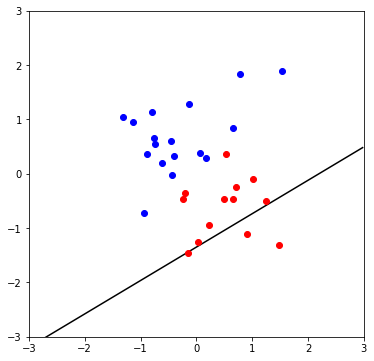

In [210]:
import matplotlib.pyplot as plt

seq =np.arange(-3, 3, 0.02)
print(seq.shape)
plt.figure(figsize = (6, 6))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.plot(seq, -(theta[0] * seq + theta_0)/theta[1] , 'k-')
plt.plot(A[b ==  1,0], A[b ==  1,1], 'ro')
plt.plot(A[b == -1,0], A[b == -1,1], 'bo')

In [201]:
clf = ScratchSVMClassifier(num_iter=500)
clf.fit(A, b)
clf.coef_

(30, 2)
(30,)
(30, 2)
(30,)


array([ 0.0572651 , -0.09296837])

In [512]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

class ScratchSVMClassifier():
    """
    Support Vector Machineのスクラッチ実装
    
    Parameters
    -------------
    num_iter: int
        反復数
    lr: float
        Learning rate
    no_bias: bool
        バイアス項を入れない場合はTrue
    
    
    Attributes
    -------------
    coef_: ndarray, shape = [n_features, ]
    loss_: ndarray, shape = [self._iter, ]
    val_loss: ndarray, shape = [self._iter, ]
    lmbd: ndarray, shape = [n_samples, ]
        ラグランジュ乗数
    """
    def __init__(self, num_iter=500, lr = 10**(-5), lmbd_threshold = 10**(-4), no_bias = False):
        self.iter = num_iter
        self.lr = lr
        #no_bias = Trueの時はintercept = 0（切片考慮無し）に、それ以外は1に
        self.intercept = 0 if no_bias else 1
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lmbd_threshold = lmbd_threshold
        
        #以下、fit時に初期化するものをとりあえず空で初期化
        
        #サンプル数を保管
        self.n_samples = None
        #ラグランジュ乗数
        self.lmbd = None
        #support vector参照用にtrainデータをインスタンスに保管する
        self._train_X = None
        self._train_y = None
        #support vectorのインデックス
        self.sv_idx = None
        self.coef_  = None
        self.coef_0 = None
        
        #yの重複無しの要素を格納
        self.unique_value = None
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
       SVMで学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #X, yをnpのarrayにしておく
        X = np.array(X)
        y = np.array(y)

        #-1, 1以外の２値で入力された場合への対応（例：a, bを-1, 1に変換）
        #yの中のユニークな値を重複無しのndarrayに（[a, b, a, a, b, b] を[a, b]に ）
        self.unique_value = np.unique(y)

        #yを0, 1に変換
        #（[a, b, a, a, b, b] がaとなる場合に0(False), bとなる場合に1(True)に ）
        y = (y != self.unique_value[0]).astype(np.int64) 
        #yを-1, 1に変換
        y = (1-(-1))*y - 1 
        
        #サンプル数をインスタンス変数に保管
        self.n_samples = len(X)
        #サンプル数分のラグランジュ乗数をゼロで初期化
        self.lmbd = np.zeros(self.n_samples)
        
        #train dataをfit後にも参照できるように保管しておく
        self._train_X = X
        self._train_y = y

        #lmbdを算出
        self._update_lmbd(X, y)
        
        #lmbdを元にしてtheta(coef_)を算出
        self._gradient_descent(X, y)
    
    def predict(self, X_test):
        X_test = np.array(X_test)
        
        #この式はよくわからない
        #pred = self.lmbd[self.sv_idx]*self._train_y[self.sv_idx]*self._linear_kernel(X_test, self._train_X[self.sv_idx])
        
        #pred = np.dot(self.coef_, X_test.T) + self.coef_0
        pred = np.dot(self.coef_, X_test.T)
        #0より大きければ1, 小さければ0に変換
        pred = (pred > 0).astype(np.int64)
        #0ならa, 1ならbに変換
        pred = self.unique_value[pred]
        return pred
    
    def predict_proba(self, X_test):
        """
        推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        return
        
    
    def _linear_kernel(self, x1, x2):
        """
        Parameters
        -----------
        x1: ndarray of shape(n_features, )
        x2: ndarray of shape(n_features, )

        Returns
        -----------
        A scaler value processed with linear kernel function

        Note
        -----------
        """
        #(n_features, )を念の為(1, n_features)に整形
        x1 = x1.reshape(1, -1)
        x2 = x2.reshape(1, -1)
        
        return np.dot(x1, x2.T)
    
    def _gaiussian_kernel(x1, x2, gamma):
        """
        Parameters
        -----------
        z: ndarray of shape(any, any)

        Returns
        -----------
        kernel

        Note
        -----------
        """
        
        diff = x1 - x2
        return np.exp(-gamma * np.dot(diff, diff))
    
    def _update_lmbd(self, X, y):
        """
        Parameters
        -----------
        X: ndarray of shape (n_samples, n_features)
        y: ndarray of shape (n_samples, 1)
        
        Returns
        -----------
        none

        Note
        -----------
        update instance variable of lagrange coefficient lambda
        
        """
        for i in range(self.iter):
            for s in range(self.n_samples):
                #行ごとの計算を一時保管
                sgm = 0.0
                for t in range(self.n_samples):
                    #任意の２行同士の要素を計算するために, s番目とt番目のサンプルでn^2のループ
                    sgm += self.lmbd[t]*y[s]*y[t]*self._linear_kernel(X[s, :], X[t, :]) + self.lmbd[s]*y[s]*y[t]
                
                #合計値と学習率を用いてlmbdを更新
                self.lmbd[s] = self.lmbd[s] + self.lr*(1-sgm)
            #iterごとのコストを保管
            self.loss[i] = self._L(X, y)
            
        #return値無し（インスタンス変数を更新する）
        return

    def _L(self, X, y):
        #print((self.lmbd * y).shape)
        #print(((self.lmbd * y) @ X).shape)
        #print((X.T).shape)
        
        #return  self.lmbd.sum() - (self.lmbd @ (self.lmbd).reshape(-1, 1)) * ((y @ X) @ (X.T @  y.reshape(-1, 1)))/2
        return  self.lmbd.sum() - (((self.lmbd * y) @ X) @ (X.T @ ((self.lmbd).reshape(-1, 1) * y.reshape(-1, 1))))/2
    def _gradient_descent(self, X, y):
        """
        Parameters
        -----------
        X: ndarray of shape (n_samples, n_features)
        y: ndarray of shape (1, n_samples)
        
        Returns
        -----------
        none

        Note
        -----------
        update coefficient of each features in X (theta)
        
        """
        #lambda > 0を満たしているものをサポートベクターとしてTrueでラベルしてインデックスに使用
        #サポートベクトルを絞るため、便宜上lmbd = 0.0001などにする
        self.sv_idx = (self.lmbd > self.lmbd_threshold)

        #thetaの算出
        self.coef_ = np.dot(self.lmbd[self.sv_idx]*y[self.sv_idx], X[self.sv_idx, :])
        #theta_0の算出
        self.coef_0 =  (y[self.sv_idx] - np.dot(self.coef_, X[self.sv_idx].T)).sum()/self.sv_idx.sum()
        
        """
        #thetaの算出
        self.coef_ = np.dot(self.lmbd[self.sv_idx]*y[self.sv_idx], X[self.sv_idx, :])
        print(self.coef_.shape)
        #theta_0の算出
        theta_0 =  (y[self.sv_idx] - np.dot(self.coef_, X[self.sv_idx].T)).sum()/self.sv_idx.sum()
        theta_0 = np.array(theta_0)
        
        #self.coef_の先頭（列方向）にtheta_0を追加
        self.coef_ = np.insert(self.coef_, 0, theta_0)
        """
        return

    def decision_region(self, X, y, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel',  target_names=['1', '-1']):
        """
        ２値分類を２次元の特徴量で学習したモデルの決定領域を描く
        背景の色が学習したモデルによる推定値から描画される
        散布図の点は学習用のデータである。

        Parameters
        ---------------
        X: ndarray, shape(n_samples, 2)
            特徴量
        y: ndarray, shape(n_samples,)
            正解値
        model: object
            学習したモデルのインスタンスを入れる
        step: float, (default: 0.1)
            推定値を計算する間隔を設定する
        title: str
            グラフのタイトルの文章を与える
        xlabel, ylabel: str
            軸ラベルの文章を与える
        target_names=: list of str
            凡例の一覧を与える
        ---------------
        """
        #setting
        scatter_color = ['red', 'blue']
        contourf_color = ['skyblue', 'pink']
        n_class = 2
        
        
        #pred
        #各特徴量に対してメッシュを生成（a=(a1, a2, a3), b=(b1, b2, b3)に対して[[a1, b1], [a1, b2], [a1, b3]], [[a2, b1], [a2, b2], [a2, b3]], [[a3, b1], [a3, b2], [a3, b3]]を生成）
        mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))

        #多次元を一次元配列に
        mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
        pred = self.predict(mesh).reshape(mesh_f0.shape)

        #plot
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        #等高線塗りつぶし
        plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
        #等高線塗りつぶし
        plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha = 0.5)
        #重複しない要素に対して, 答えをプロット
        for i, target in enumerate(set(np.unique(y))):
            plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=20, color=scatter_color[i], label=target_names[i], marker='o')

        #trainデータに関してプロットしている時には
        if (check_same_ary(y, self._train_y)):
            #support vectorを黄色に
            plt.scatter(X[self.sv_idx, 0], X[self.sv_idx, 1], s=20, color='yellow' , label='supprt vector', marker='o')
        
        plt.legend()
        plt.show

    def check_same_ary(self, a, b):
        return (a == b).all() if (a.shape == b.shape) else False
    
    #学習曲線Plot用の関数
    def plot_learning_curve(self):
        fig, ax = plt.subplots(1,1, figsize=(4,4 ))
        ax.plot(np.array(range(self.iter)), self.loss, "-", label = 'train')
        #ax.plot(np.array(range(self.iter)), self.val_loss, "-", label = 'validation')

        #label
        ax.set_title('Learning Curve')
        ax.set_xlabel('n of iterations')
        ax.set_ylabel('Lagrangian')
        ax.legend()

In [479]:
import numpy as np

np.random.seed(seed=0)
n_samples = 100
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [480]:
from sklearn.model_selection import  train_test_split
#split arrays into two (train, test)
#shuffling is True by default
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3/4)

/Users/ohmori/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [481]:
#confirm if correctly split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 2)
(25, 2)
(75,)
(25,)


In [482]:
#Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#trainデータからmeanとstdevを計算
scaler.fit(X_train)
#normarize x -> (x - x_mean)/s
X_train_z = scaler.transform(X_train)
X_test_z = scaler.transform(X_test)

### 可視化

[-1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1
 -1]
[-1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1
 -1]


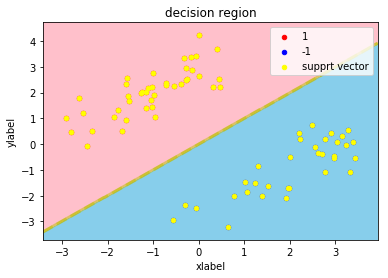

In [464]:
clf = ScratchSVMClassifier(num_iter=500, lr = 10**(-5), lmbd_threshold = 10**(-3))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(y_test)
print(pred)
pred == y_test
decision_region(X_train, y_train, clf)

[-1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1
 -1]
[-1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1
 -1]


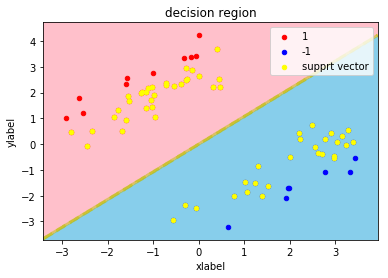

In [465]:
clf = ScratchSVMClassifier(num_iter=500, lr = 10**(-5), lmbd_threshold = 2*10**(-3))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(y_test)
print(pred)
pred == y_test
decision_region(X_train, y_train, clf)

[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]
[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]


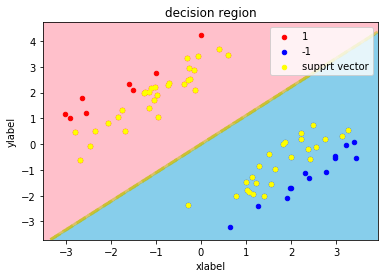

In [515]:
clf = ScratchSVMClassifier(num_iter=1000, lr = 10**(-5), lmbd_threshold = 2*10**(-3))
clf.fit(X_train, y_train, X_test, y_test)
pred = clf.predict(X_test)
print(y_test)
print(pred)
pred == y_test
clf.decision_region(X_train, y_train)

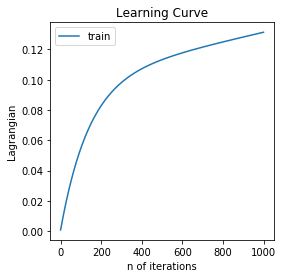

In [516]:
clf.plot_learning_curve()

[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]
[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]


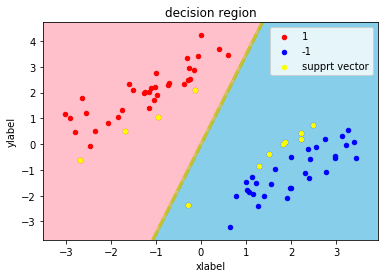

In [416]:
clf = ScratchSVMClassifier(num_iter=500, lr = 10**(-5), lmbd_threshold = 3*10**(-3))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(y_test)
print(pred)
pred == y_test
decision_region(X_train, y_train, clf)

[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]
[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]


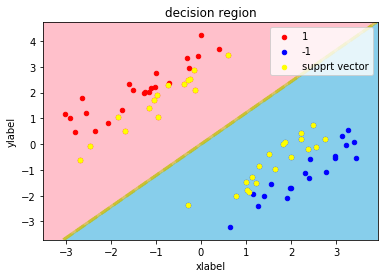

In [419]:
clf = ScratchSVMClassifier(num_iter=500, lr = 10**(-5), lmbd_threshold = 2.5*10**(-3))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(y_test)
print(pred)
pred == y_test
decision_region(X_train, y_train, clf)

[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]
[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]


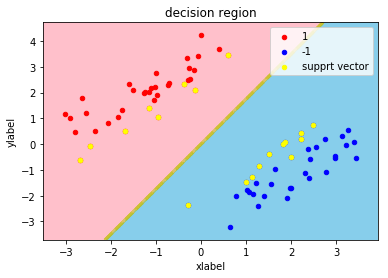

In [423]:
clf = ScratchSVMClassifier(num_iter=500, lr = 10**(-5), lmbd_threshold = 2.8*10**(-3))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(y_test)
print(pred)
pred == y_test
decision_region(X_train, y_train, clf)

## To do
* shape(n_samples, 1)に対応
* costのプロット


## 【問題2】（アドバンス課題）多項式カーネル関数の作成
問題1では線形カーネルを使用しましたが、多項式カーネルにも切り替えられるようにしましょう。



## 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

## 【問題4】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

これまで使用してきた関数に、サポートベクターを色を変えて表示する機能を加えてください。

特にSprint0で作成したシンプルデータセット1に対して以下のように分類ができるかを検証してください。

## 【問題5】時間の計測
SVMの学習には時間がかかるため、効率的な実装が望まれます。事前学習期間に行なったように、時間を計測して改善していきましょう。特に 
λ
 の更新部分は繰り返し処理が多いため、効率的なコードを目指してください。

## 【問題6】ロジスティック回帰とSVM
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

ロジスティック回帰とSVMは本質的に何が異なっているか
